3 To - Do Exercise:

Problem - 1: Perform a classification task with knn from scratch.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 1. Load the Dataset:
data = pd.read_csv('diabetes_.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
(data == 0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


In [ ]:
# 2. Handle Missing Data:
zero_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in zero_cols:
    data.loc[data[col] == 0, col] = np.nan #Replace all 0s with NaN

for col in data.columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True) #Replace Nan values with median

print("Data with value as 0:\n ")
print((data == 0).sum())
print("\nMissing values after imputation: \n")
print(data.isnull().sum())


Data with value as 0:
 
Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Missing values after imputation: 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# 3. Feature Engineering:
X = data.drop(columns=["Outcome"]).values
y = data["Outcome"].values
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
  np.random.seed(random_seed)
  indices = np.arange(X.shape[0])
  np.random.shuffle(indices) # Shuffle the indices
  test_split_size = int(len(X) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]
  X_train, X_test = X[train_indices], X[test_indices]
  y_train, y_test = y[train_indices], y[test_indices]
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


In [ ]:
import numpy as np

def euclidean_distance(point1, point2):
    if point1.shape != point2.shape:  # make sure both points have same number of features
        raise ValueError("Both points must have the same number of features.")
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Predict class for a single test sample
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]  # distances to all training points
    nearest_indices = np.argsort(distances)[:k]  # indices of k closest neighbors
    nearest_labels = y_train[nearest_indices]    # labels of those neighbors
    prediction = np.bincount(nearest_labels).argmax()  # most frequent label
    return prediction

# Predict classes for all test samples
def knn_predict(X_test, X_train, y_train, k=3):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])

# Compute accuracy
def compute_accuracy(y_true, y_pred):
    if y_true.shape != y_pred.shape:  # check to avoid shape mismatch
        raise ValueError("y_true and y_predicted must have the same shape.")
    return np.sum(y_true == y_pred) / len(y_true) * 100

# Run predictions and calculate accuracy
try:
    predictions = knn_predict(X_test, X_train, y_train, k=3)
    accuracy = compute_accuracy(y_test, predictions)
    print(f"KNN Accuracy on the test set: {accuracy:.2f}%")
except ValueError as ve:
    print(f"ValueError: {ve}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


KNN Accuracy on the test set: 67.83%


In [ ]:
#Problem - 2 - Experimentation:

import numpy as np

# 1. Scale the features
def standard_scaler(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

X_scaled = standard_scaler(X)  # scale all features

# 2. Split scaled data into train and test sets
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)

# 3. Train KNN on scaled data
scaled_predictions = knn_predict(X_test_s, X_train_s, y_train_s, k=3)

# 4. Calculate accuracy
scaled_accuracy = compute_accuracy(y_test_s, scaled_predictions)
print(f"Accuracy on scaled data: {scaled_accuracy:.2f}%")

# 5. Compare with original data
original_predictions = knn_predict(X_test, X_train, y_train, k=3)
original_accuracy = compute_accuracy(y_test, original_predictions)
print(f"Accuracy on original data: {original_accuracy:.2f}%")

# 6. Difference in accuracy
print(f"Difference (Scaled - Original): {scaled_accuracy-original_accuracy:.2f}%")

# • Discuss:
# How scaling impacted the KNN performance.
# Scaling helps KNN because all features are treated equally.

# The reason for any observed changes in accuracy.
# Larger features no longer dominate distances.
# This usually improves accuracy.


Accuracy on scaled data: 67.39%
Accuracy on original data: 67.83%
Difference (Scaled - Original): -0.43%


In [ ]:
# Problem - 3 - Experimentation with k:
import time
import matplotlib.pyplot as plt

k_values = range(1, 16)
acc_original, acc_scaled = [], []
time_original, time_scaled = [], []

for k in k_values:
    # Original data
    start = time.time()
    preds = knn_predict(X_test, X_train, y_train, k)
    time_original.append(time.time() - start)
    acc_original.append(compute_accuracy(y_test, preds))


    # Scaled data
    start = time.time()
    preds_s = knn_predict(X_test_s, X_train_s, y_train_s, k)
    time_scaled.append(time.time() - start)
    acc_scaled.append(compute_accuracy(y_test_s, preds_s))
for i, k in enumerate(k_values):
    print(f"k = {k}")
    print(f"Original Data Accuracy: {acc_original[i]:.2f}%, Time: {time_original[i]:.6f} seconds")
    print(f"Scaled Data Accuracy:   {acc_scaled[i]:.2f}%, Time: {time_scaled[i]:.6f} seconds")

k = 1
Original Data Accuracy: 67.39%, Time: 0.823158 seconds
Scaled Data Accuracy:   66.52%, Time: 1.245471 seconds
k = 2
Original Data Accuracy: 70.00%, Time: 1.386996 seconds
Scaled Data Accuracy:   67.39%, Time: 1.479350 seconds
k = 3
Original Data Accuracy: 67.83%, Time: 1.077267 seconds
Scaled Data Accuracy:   67.39%, Time: 0.790540 seconds
k = 4
Original Data Accuracy: 70.43%, Time: 0.779931 seconds
Scaled Data Accuracy:   68.70%, Time: 0.788717 seconds
k = 5
Original Data Accuracy: 67.39%, Time: 0.794199 seconds
Scaled Data Accuracy:   71.74%, Time: 0.791566 seconds
k = 6
Original Data Accuracy: 70.00%, Time: 0.769783 seconds
Scaled Data Accuracy:   68.26%, Time: 0.807673 seconds
k = 7
Original Data Accuracy: 70.87%, Time: 0.816415 seconds
Scaled Data Accuracy:   70.00%, Time: 0.788996 seconds
k = 8
Original Data Accuracy: 69.13%, Time: 0.896208 seconds
Scaled Data Accuracy:   73.48%, Time: 1.398827 seconds
k = 9
Original Data Accuracy: 70.87%, Time: 1.239939 seconds
Scaled Data

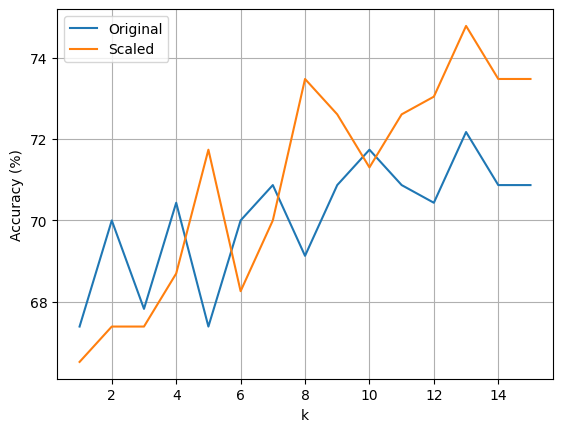

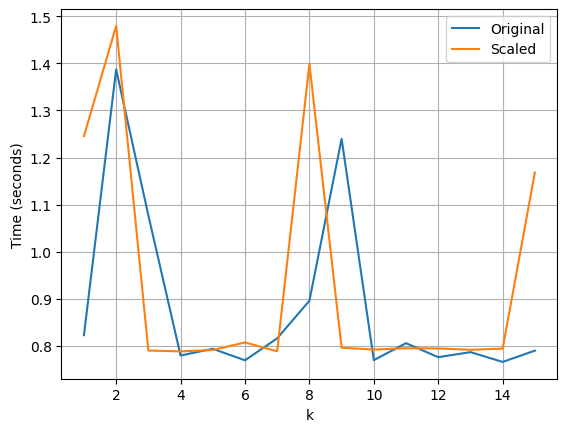

In [ ]:
# 2. Visualize the Results:
plt.plot(k_values, acc_original, label="Original")
plt.plot(k_values, acc_scaled, label="Scaled")
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid()
plt.show()

# Time plot
plt.figure()
plt.plot(k_values, time_original, label="Original")
plt.plot(k_values, time_scaled, label="Scaled")
plt.xlabel("k")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid()
plt.show()

3. Analyze and Discuss:

• Discuss how the choice of k affects the accuracy and computational cost.

    Effect of k on accuracy

    Small k (1-3): Very sensitive to noise and outliers, may cause overfitting.

    Medium k (4-7): Accuracy improves and becomes stable, shows good generalization.

    Large k (8-15): Model becomes too smooth, which may lead to underfitting.

    Effect of k on computational cost

    Prediction time increases slightly as k increases.

    The increase in time is gradual and manageable.


• Identify the optimal k based on your analysis.

    Optimal k

    The optimal k is the one with the highest accuracy and reasonable time.

    From the results, k value at 13 performs best.
    Highest original accuracy:
    72.17% at k = 13

    Highest scaled accuracy:
    74.78% at k = 13

    If multiple k values give similar accuracy, a smaller k is preferred to save time